In [2]:
import pandas as pd

In [55]:
df1=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Aracaju.xlsx")
df2=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fortaleza.xlsx")
df3=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Natal.xlsx")
df4=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Recife.xlsx")
df5=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Salvador.xlsx")

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nova seção

In [57]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520.0,1.0
1,Aracaju,2018-01-01,14.21,1522.0,6.0
2,Aracaju,2018-01-01,71.55,1520.0,1.0
3,Aracaju,2018-01-01,3.01,1521.0,7.0
4,Aracaju,2018-01-01,24.51,1522.0,8.0


In [6]:
df = pd.concat([df1,df2, df3, df4, df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [43]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde,mes_venda,dia_venda,diferença_dias,Receita,Ano_Venda
235,Salvador,2018-01-01,41.84,1034,1,1,3,0 days,41.84,2018
236,Salvador,2018-01-01,126.29,1035,3,1,3,0 days,378.87,2018
237,Salvador,2018-01-01,38.06,1036,3,1,3,0 days,114.18,2018
238,Salvador,2018-01-01,139.64,1035,1,1,3,0 days,139.64,2018
239,Salvador,2018-01-01,161.41,1037,3,1,3,0 days,484.23,2018


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df .dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,mes_venda,dia_venda,diferença_dias,Receita
12,Fortaleza,2018-01-01,80.73,1004,2,1,1,0 days,161.46
145,Natal,2018-01-01,84.62,1034,2,1,2,0 days,169.24
65,Aracaju,2018-01-01,145.54,1522,3,1,1,0 days,436.62
59,Salvador,2018-01-01,138.27,1034,2,1,1,0 days,276.54
17,Recife,2018-01-01,142.45,981,3,2,14,0 days,427.35


In [16]:
df["Vendas"].mean()

122.61180089485458

In [36]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [20]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [33]:
df["Data"] = pd.to_datetime(df["Data"])

In [34]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
mes_venda                   int64
dia_venda                   int64
diferença_dias    timedelta64[ns]
dtype: object

In [37]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    346422.98
Name: Receita, dtype: float64

In [40]:
df["Ano_Venda"] = df["Data"].dt.year

In [41]:
df.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,mes_venda,dia_venda,diferença_dias,Receita,Ano_Venda
95,Salvador,2018-01-01,5.13,1035,1,1,1,0 days,5.13,2018
212,Natal,2018-01-01,50.73,1037,3,1,2,0 days,152.19,2018
36,Fortaleza,2018-01-01,36.31,1004,2,1,1,0 days,72.62,2018
181,Natal,2018-01-01,244.83,1037,2,1,2,0 days,489.66,2018


In [15]:
df["mes_venda"], df["dia_venda"]  = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(9)

,Cidade,Data,Vendas,LojaID,Qtde,mes_venda,dia_venda,diferença_dias,Receita,Ano_Venda
136,Salvador,2018-01-01,13.81,1036,1,3,2,0 days,13.81,2018
127,Natal,2018-01-01,240.61,1035,3,1,2,0 days,721.83,2018
140,Recife,2018-01-01,166.89,983,5,3,2,0 days,834.45,2018
33,Recife,2018-01-01,32.33,982,1,1,1,0 days,32.33,2018
195,Natal,2018-01-01,44.89,1036,3,1,2,0 days,134.67,2018
69,Fortaleza,2018-01-01,216.65,1003,6,1,1,0 days,1299.90,2018
139,Recife,2018-01-01,141.16,980,7,3,2,0 days,988.12,2018
84,Fortaleza,2018-01-01,147.46,1003,6,1,1,0 days,884.76,2018
103,Salvador,2018-01-01,191.60,1034,1,1,1,0 days,191.60,2018


In [52]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [23]:
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [27]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,mes_venda,dia_venda,diferença_dias
84,Salvador,2018-01-01,22.99,1036,1,1,1,0 days
21,Fortaleza,2018-01-01,40.63,1004,3,1,1,0 days
52,Natal,2018-01-01,778.00,854,4,4,27,0 days
13,Fortaleza,2018-01-01,118.58,1003,4,2,12,0 days
54,Fortaleza,2018-01-01,16.73,1002,5,1,1,0 days
41,Recife,2018-01-01,157.78,981,4,2,13,0 days
157,Salvador,2018-01-01,150.17,1036,2,1,2,0 days
125,Fortaleza,2018-01-01,37.60,983,4,3,2,0 days
44,Salvador,2018-01-01,43.26,1037,2,1,1,0 days
106,Salvador,2018-01-01,149.19,1035,2,1,1,0 days


In [28]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

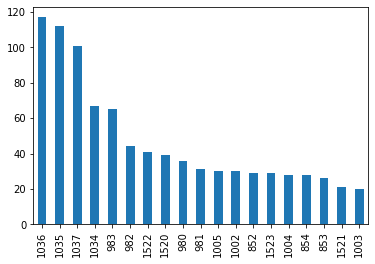

In [50]:
df["LojaID"].value_counts(ascending=False).plot.bar();

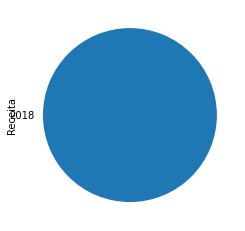

In [58]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [59]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

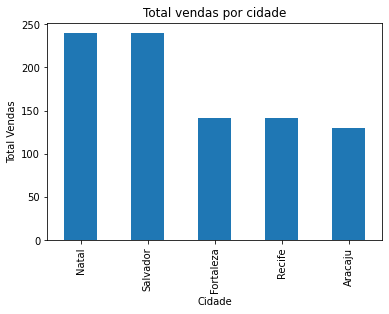

In [61]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title ="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

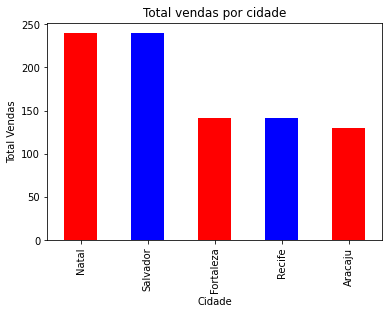

In [65]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title ="Total vendas por cidade", color=("red","blue"))
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [86]:
plt.style.use("grayscale")

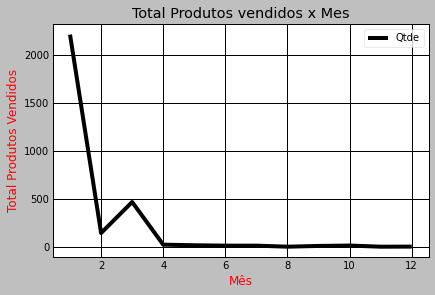

In [87]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x Mes")
plt.xlabel("Mês", color= "red")
plt.ylabel("Total Produtos Vendidos", color ="red")
plt.legend();

In [88]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [91]:
df_2019 = df[df["Ano_Venda"] == 2018]

In [92]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

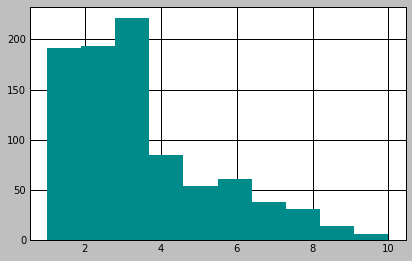

In [100]:
plt.hist(df["Qtde"], color="darkcyan");

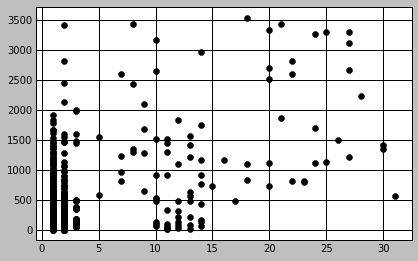

In [101]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

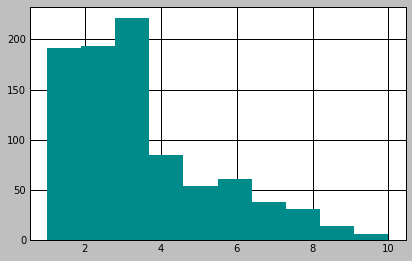

In [102]:
plt.hist(df["Qtde"], color="darkcyan");
plt.savefig("Histograma.png")